In [5]:
import numpy as np
import matplotlib.pyplot as plt

from Faraday.two_dim import matplotlib_style
matplotlib_style.paper()

### fig.1

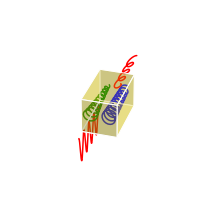

In [10]:
#plt.rcParams['figure.facecolor'] = '#FFFFFF'
#plt.rcParams['axes.facecolor'] = "none"
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
z1 = np.linspace(0, 8.0*np.pi, 200)
z2 = np.linspace(z1[-1], z1[-1] + 8.0*np.pi, 200)
z3 = np.linspace(z2[-1], z2[-1] + 8.0*np.pi, 200)
z = np.hstack([z1, z2, z3])
E0 = 1.0
a = 0.4
b = 0.4
k = 0.5
kr=0.2
kl=0.5
n = 1.5
dn = 0.03
rcp1 = a * np.exp(1.0j * z1) * np.array([1, 1.0j]).reshape((-1, 1))
lcp1 = b * np.exp(1.0j * z1) * np.array([1, -1.0j]).reshape((-1, 1))

rcp2 = a * np.exp(1.0j * z2) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp(1.0j * (n+dn)*(z2-z2[0])) * np.exp(-kr*(z2-z2[0])/10)
lcp2 = b * np.exp(1.0j * z2) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp(1.0j * (n-dn)*(z2-z2[0])) * np.exp(-kl*(z2-z2[0])/10)

rcp3 = a * np.exp(1.0j * z3) * np.array([1, 1.0j]).reshape((-1, 1)) * np.exp(1.0j * (n+dn)*(z2[-1]-z2[0])) * np.exp(-kr*(z2[-1]-z2[0])/10)
lcp3 = b * np.exp(1.0j * z3) * np.array([1, -1.0j]).reshape((-1, 1)) * np.exp(1.0j * (n-dn)*(z2[-1]-z2[0])) * np.exp(-kl*(z2[-1]-z2[0])/10)

rcp = np.hstack([rcp1, rcp2, rcp3])
lcp = np.hstack([lcp1, lcp2, lcp3])

tot1 = rcp1 + lcp1
tot3 = rcp3 + lcp3

ax.plot(z1, tot1[1,:].real, tot1[0,:].real, color="red")
ax.plot(z2, rcp2[1,:].real - 0.5, rcp2[0,:].real, "b")
ax.plot(z2, lcp2[1,:].real + 0.5, lcp2[0,:].real, "g")
ax.plot(z3, tot3[1,:].real, tot3[0,:].real, color="red")

x = [-1,1]
y = [-1,1]
X,Y = np.meshgrid(x,y)
One = np.ones_like(X)

alpha = 0.3
color1 = '#fde614'
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], Y, -One, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], One, Y, alpha=alpha, color=color1)
ax.plot_surface((X+1) * (z2[-1]-z2[0]) / 2 + z2[0], -One, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[0], X, Y, alpha=alpha, color=color1)
ax.plot_surface(One * z2[-1], X, Y, alpha=alpha, color=color1)

ax.set_box_aspect((5,1,1))

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax.axis("off")

#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)
ax.view_init(elev=32, azim=-163)
fig.savefig("images/mo-effect/1.png", transparent=True, dpi=400)